In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
import json
import pandas as pd
import seaborn as sns

In [5]:
all_play_returns = []
all_test_returns = []

results_root = Path(".") / "results"

min_num_episodes = 100000000

for subdir in [x for x in results_root.iterdir() if x.is_dir()]:

    # load in parameters
    with open(str(subdir/"params.txt")) as f:
        params = json.load(f)


    agent = params["agent"]

    if agent == "uniform_zpd":
        offset = params["zpd"]["offset"]
        radius = params["zpd"]["radius"]
    else:
        offset = None
        radius = None
    
    if agent != "DDQN":
        mix_ratio = params["zpd"]["mix_ratio"]
    else:
        mix_ratio = None

    seed = params["seed"]

    # load play returns
    play_returns_path = subdir/"play_returns.npy"
    if play_returns_path.exists():
        play_returns = np.load(play_returns_path)
        if len(play_returns) < min_num_episodes:
            min_num_episodes = len(play_returns)
        all_play_returns.append([agent, offset, radius, seed, mix_ratio] + list(play_returns))
    
    # load test returns
    test_returns_path = subdir/"test_returns.npy"
    if test_returns_path.exists():
        test_returns = np.array(np.load(test_returns_path))


        test_returns = np.mean(test_returns, axis=1)
        
        if len(test_returns) == 100:
            test_returns = test_returns[1::2] # every second 
        all_test_returns.append([agent, offset, radius, seed, mix_ratio] + list(test_returns))


In [6]:
cat_cols = ["agent", "offset", "radius", "seed",  "mix_ratio"]
cols = cat_cols + list(range(50))
all_test_returns = pd.DataFrame(data= all_test_returns, columns = cols )
all_test_returns = all_test_returns.infer_objects()
all_test_returns = all_test_returns.set_index(cat_cols)
all_test_returns = all_test_returns.cumsum(axis=1)
all_test_returns = all_test_returns.reset_index()


for i in range(len(all_play_returns)):
    all_play_returns[i] = all_play_returns[i][:min_num_episodes + len(cat_cols)]

cols = cat_cols + list(range(min_num_episodes))
all_play_returns = pd.DataFrame(data= all_play_returns, columns = cols )
all_play_returns= all_play_returns.infer_objects()
all_play_returns= all_play_returns.set_index(cat_cols)
all_play_returns= all_play_returns.cumsum(axis=1)
all_play_returns= all_play_returns.reset_index()


# condition on mix ratio
#all_test_returns = all_test_returns[all_test_returns['mix_ratio'] == 1/4]
#all_play_returns = all_play_returns[all_play_returns['mix_ratio'] == 1/4]


In [7]:
all_test_returns

,agent,offset,radius,seed,mix_ratio,0,1,2,3,4,...,40,41,42,43,44,45,46,47,48,49
0,uniform_zpd,4.0,2.0,5396,0.25,0.6,1.4,2.4,2.4,4.6,...,291.1,297.5,302.9,312.3,324.4,330.3,338.8,347.5,360.7,367.2
1,uniform_zpd,-2.0,4.0,8479,0.25,0.0,1.6,1.8,2.6,3.6,...,219.7,235.1,251.9,262.1,278.2,283.0,287.4,292.6,302.5,313.1
2,uniform_zpd,2.0,2.0,8479,0.25,0.1,0.1,0.7,1.0,2.0,...,293.6,304.9,312.3,327.9,335.3,342.3,353.6,365.4,376.7,393.3
3,uniform_zpd,2.0,0.0,8479,0.25,0.1,0.5,0.7,1.1,2.7,...,228.4,236.2,242.9,250.6,259.2,266.9,275.5,282.2,290.8,298.5
4,uniform_zpd,0.0,0.0,9943,0.25,0.3,0.3,0.8,1.4,2.9,...,308.6,320.6,333.0,340.0,347.6,364.8,372.1,384.5,391.5,400.4
5,uniform_zpd,0.0,4.0,9943,0.25,0.0,0.1,0.7,1.1,2.1,...,287.1,294.7,301.0,308.6,320.1,327.0,333.9,340.8,347.1,358.6
6,unseq_DDQN,NaN,NaN,8479,0.25,0.5,0.5,0.7,3.1,5.9,...,663.2,673.3,695.3,699.3,722.3,740.3,763.7,784.2,812.4,841.7
7,uniform_zpd,4.0,0.0,8479,0.25,0.1,0.1,0.6,1.6,3.4,...,275.5,287.0,293.8,302.7,312.3,321.2,334.0,342.4,353.4,360.6
8,uniform_zpd,0.0,2.0,9943,0.25,0.1,0.3,0.3,0.4,1.0,...,280.9,286.8,294.2,304.3,320.2,326.1,332.0,347.3,357.2,373.0
9,uniform_zpd,0.0,2.0,5396,0.25,0.1,0.4,0.9,1.5,2.7,...,319.9,332.8,348.8,356.0,365.6,378.0,394.8,408.5,420.1,431.7


In [8]:
all_test_returns_melt = pd.melt(all_test_returns, id_vars= cat_cols
, var_name = "Step",value_name= "Reward", value_vars=list(range(0, 50)))

all_test_returns_melt['Config'] = all_test_returns_melt["agent"].str.cat(all_test_returns_melt['offset'].astype(str), sep = ": ").str.cat(all_test_returns_melt['radius'].astype(str), sep = ": ").str.cat(all_test_returns_melt['mix_ratio'].astype(str), sep = ": ")    



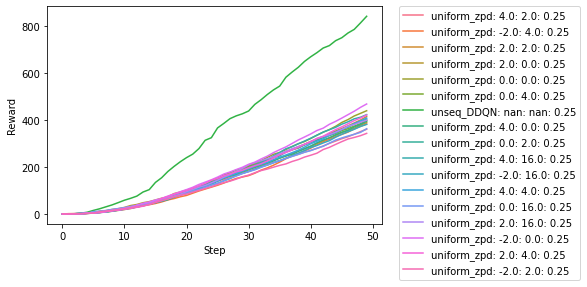

In [9]:


plot = sns.lineplot(x="Step", y= "Reward", hue="Config",ci = None,  data=all_test_returns_melt)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("figures/cumulative_test_mix.pdf", bbox_inches = "tight")

In [10]:
all_play_returns_melt = pd.melt(all_play_returns, id_vars= cat_cols
, var_name = "Step",value_name= "Reward", value_vars=list(range(0, min_num_episodes)))

all_play_returns_melt['Config'] = all_play_returns_melt["agent"].str.cat(all_play_returns_melt['offset'].astype(str), sep = ": ").str.cat(all_play_returns_melt['radius'].astype(str), sep = ": ").str.cat(all_play_returns_melt['mix_ratio'].astype(str), sep = ": ")



In [11]:
all_play_returns[all_play_returns[25715].argmax()]

KeyError: 25715

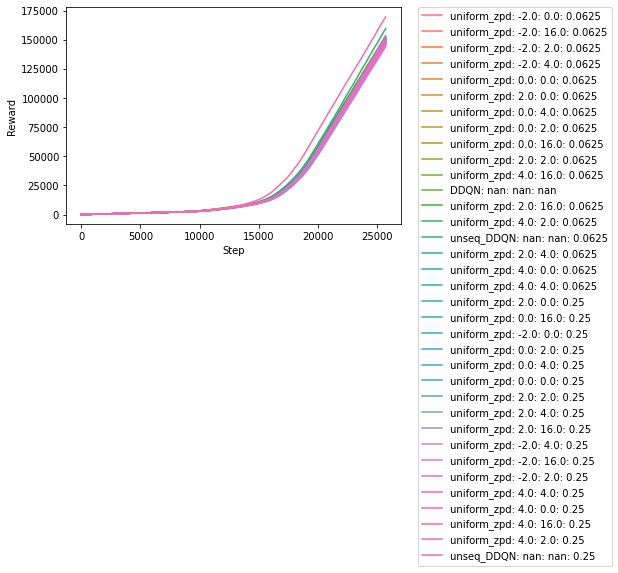

In [22]:
plot = sns.lineplot(x="Step", y= "Reward", hue="Config",ci = None,  data=all_play_returns_melt)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("figures/cumulative_play.pdf", bbox_inches = "tight")